<a href="https://colab.research.google.com/github/so3500/2024-spark/blob/main/week3_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare Environment

Install Dependencies:


1.   Java 8
2.   Apache Spark with hadoop and
3.   Findspark (used to locate the spark in the system)

> If you have issues with spark version, please upgrade to the latest version from [here](https://archive.apache.org/dist/spark/).

In [1]:
### java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

### spark & pyspark
#!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!cp /content/drive/MyDrive/2024_pyspark/spark-3.5.1-bin-hadoop3.tgz /content/
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

### test data
!cp -r /content/drive/MyDrive/2024_pyspark/weather_data /content/

In [62]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, year, datediff, expr, min, max, filter, count_if, when, trim, to_date
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, DoubleType

spark = SparkSession.builder\
  .master("local[*]")\
  .getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [85]:
from pyspark.sql.dataframe import DataFrame

# Define a Peek Function
def peek(self, n=10):
  self.show(n)
  return self

# Monkey Patch the DataFrame Calss
DataFrame.peek = peek

# 폭염 & 자외선 기준으로 최고체감온도 집계하기

- 2304 ~ 2309 데이터를 모두 사용합니다. (29646 건)

데이터 필터링
- 데이터를 보니 일부 컬럼이 비어있는 row 가 있습니다.
- 폭염영향예보를 제외한 컬럼이 모두 필수값이 되도록 필터링합니다.
- 필터링 후 row 는 27335개가 됩니다.

폭염일 때와 아닐때의 최고체감온도 최소/평균/최대 값을 구하세요.

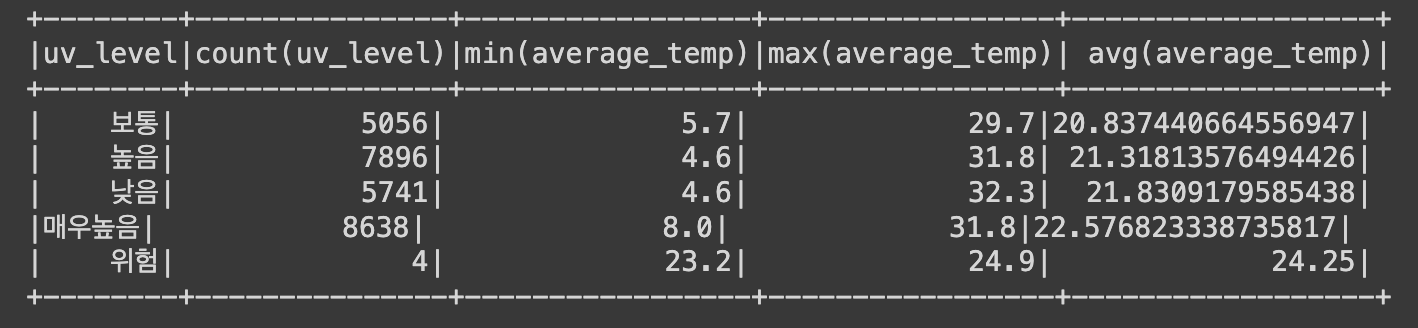

폭염특보일 때와 아닐때의 최고체감온도 최소/평균/최대 값을 구하세요.
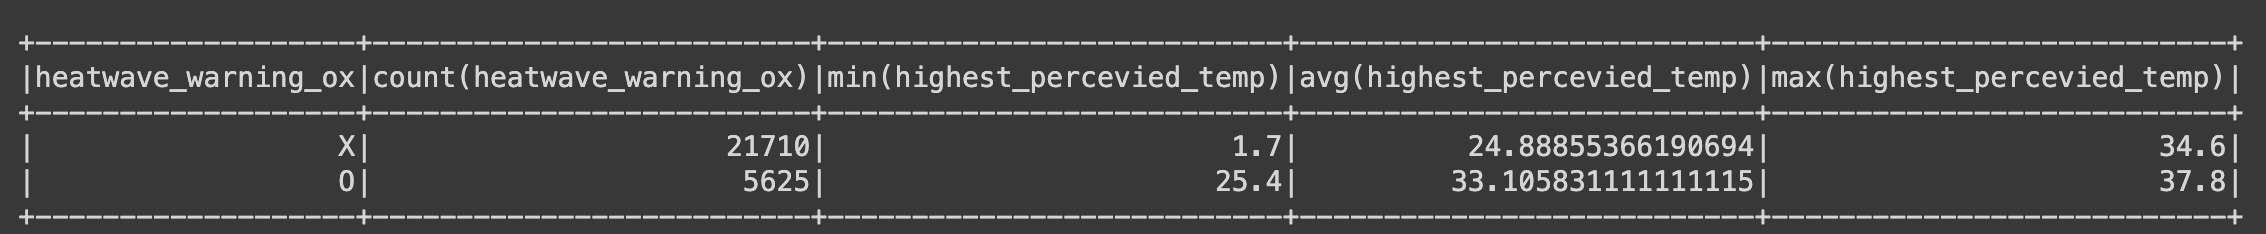

폭염영향예보 단계별 최고체감온도 최소/평균/최대 값을 구하세요.
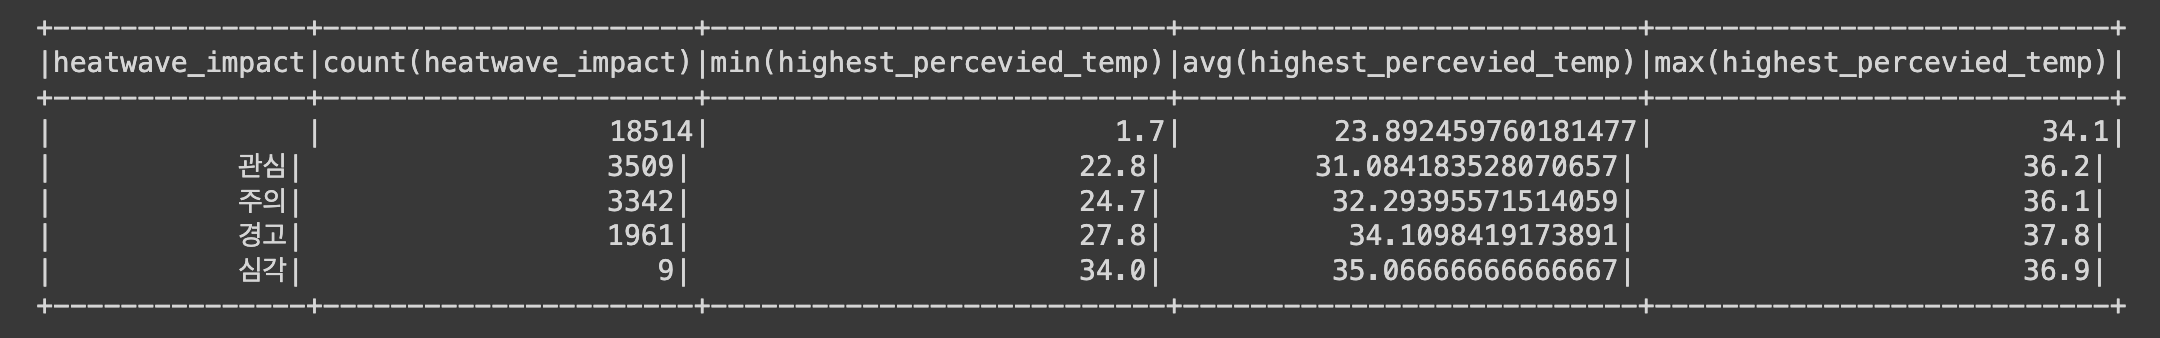

자외선 지수 단계 별 온도의 최소, 최대, 평균값을 구합니다.
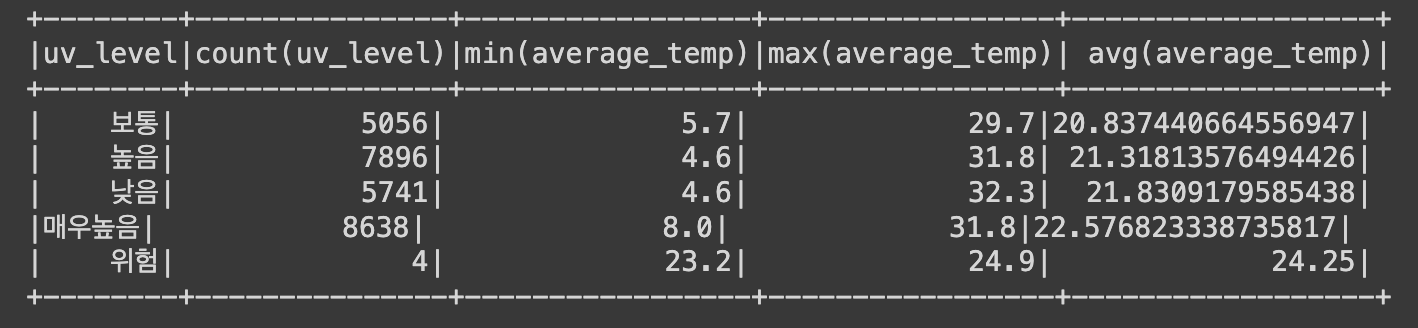